In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import ( mean_squared_error , r2_score , mean_absolute_error , accuracy_score , confusion_matrix , classification_report )
# Set random seed for reproducibility
np.random.seed (42)

In [ ]:
# Generate Synthetic Data : Temperature vs Power Consumption
# Simulate temperature data (in Celsius )
temperature = np.linspace (15 , 35 , 100)
# Simulate power consumption (kW) with some noise
# Relationship:Power increases with temperature(AC usage )
power_consumption = 2.5 * temperature + 10 + np . random . normal(0 , 5 , 100)
# Create DataFrame
data = pd.DataFrame({ "Temperature_C":temperature,"Power_kW":power_consumption})
print("Dataset Overview:")
print(data.head())
print(f"\nDataset shape:{ data.shape }")
print(f"\nStatistical Summary:")
print(data.describe())


Dataset Overview:
   Temperature_C   Power_kW
0      15.000000  49.983571
1      15.202020  47.313729
2      15.404040  51.748544
3      15.606061  56.630301
4      15.808081  48.349435

Dataset shape:(100, 2)

Statistical Summary:
       Temperature_C    Power_kW
count     100.000000  100.000000
mean       25.000000   71.980767
std         5.860907   15.531605
min        15.000000   44.499255
25%        20.000000   58.585257
50%        25.000000   71.680876
75%        30.000000   86.328317
max        35.000000   98.302821


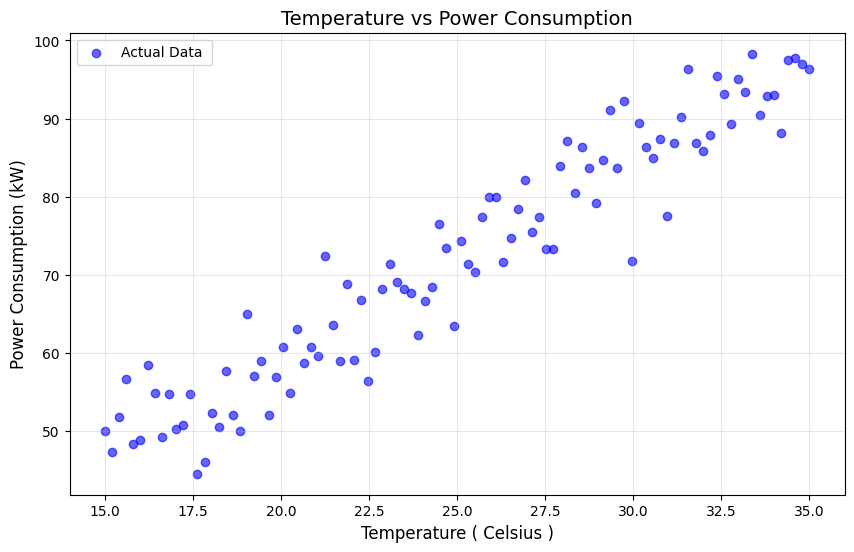

In [ ]:
# Visualize the Data
plt.figure( figsize =(10 , 6) )
plt.scatter( data [ "Temperature_C"] , data ["Power_kW"] ,
alpha=0.6 , color ="blue", label ="Actual Data ")
plt.xlabel("Temperature ( Celsius )", fontsize =12)
plt.ylabel("Power Consumption (kW)", fontsize =12)
plt.title("Temperature vs Power Consumption", fontsize =14)
plt.legend()
plt.grid( True , alpha =0.3)
plt.savefig("data_visualization .png", dpi =300 , bbox_inches ="tight")
plt.show()


In [ ]:
# Prepare Data for Training
# Separate features (X) and target (y)

X = data[["Temperature_C"]].values
y = data["Power_kW"].values

# Split data into training and testing sets (80 -20 split )

X_train , X_test , y_train , y_test = train_test_split (X , y ,
test_size =0.2 ,random_state =42)
print(f"Training set size:{len ( X_train )}")
print(f"  set size:{len ( X_test )}")

# Create and Train Linear Regression Model
# Initialize the model

model = LinearRegression ()

# Train the model (fit to training data )

model.fit( X_train , y_train )
print("\nModel Training Complete!")
print(f"Intercept(beta_0):{model.intercept_:.4f}")
print(f"Coefficient(beta_1):{model.coef_[0]:.4f}")
print(f"\nEquation:Power = {model.intercept_:.4f} + "f"{model.coef_[0]:.4f} * Temperature")

Training set size:80
  set size:20

Model Training Complete!
Intercept(beta_0):8.6458
Coefficient(beta_1):2.5302

Equation:Power = 8.6458 + 2.5302 * Temperature


In [ ]:
# ============================================================
# Make Predictions
# ============================================================

# Predict on test

y_pred = model . predict ( X_test )

# Display first 5 predictions vs actual values

print("\ nSample Predictions :")
print("-" * 50)
for i in range(5):
  print(f"Temperature:{X_test[i][0]:.2f}C")
  print(f"Predicted:{ y_pred [i ]:.2f} kW")
  print(f"Actual:{ y_test [i ]:.2f} kW")
  print(f"Error:{abs ( y_pred [i] - y_test [i]) :.2f} kW")
  print()

\ nSample Predictions :
--------------------------------------------------
Temperature:31.77C
Predicted:89.02 kW
Actual:86.83 kW
Error:2.20 kW

Temperature:25.71C
Predicted:73.69 kW
Actual:77.33 kW
Error:3.64 kW

Temperature:29.14C
Predicted:82.38 kW
Actual:84.66 kW
Error:2.28 kW

Temperature:24.09C
Predicted:69.60 kW
Actual:66.63 kW
Error:2.97 kW

Temperature:23.89C
Predicted:69.09 kW
Actual:62.33 kW
Error:6.76 kW



<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1638194726.py:11: SyntaxWarning: invalid escape sequence '\ '
  print("\ nSample Predictions :")


In [ ]:
# ============================================================
# Calculate Evaluation Metrics
# ============================================================
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test , y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred)

# R- squared Score ( Coefficient of Determination )
r2 = r2_score(y_test,y_pred)

print(" Model Performance Metrics :")
print("=" * 50)
print(f" Mean Squared Error (MSE ): {mse:.4f}")
print(f" Root Mean Squared Error ( RMSE ): { rmse:.4f}")
print(f" Mean Absolute Error (MAE ): {mae:.4f}")
print(f"R- squared Score : {r2:.4f}")

 Model Performance Metrics :
 Mean Squared Error (MSE ): 15.5511
 Root Mean Squared Error ( RMSE ): 3.9435
 Mean Absolute Error (MAE ): 3.0066
R- squared Score : 0.9325


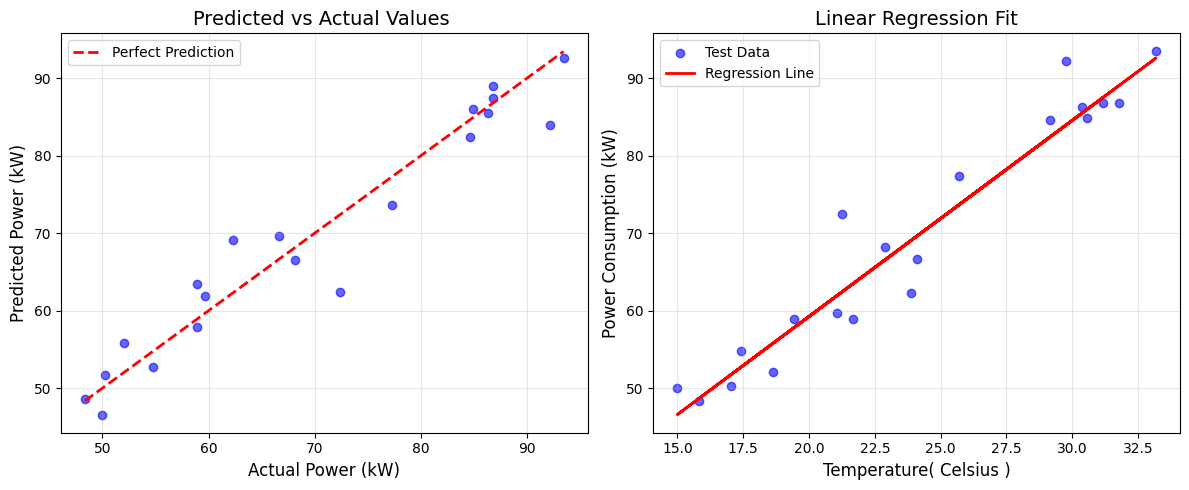

In [ ]:
# ============================================================
# Visualize Results
# ============================================================
plt.figure( figsize =(12 , 5))

#Plot1:Predictions vs Actual
plt.subplot(1 , 2 , 1)
plt.scatter(y_test ,y_pred ,alpha =0.6 , color ="blue")
plt.plot([y_test.min () ,y_test.max () ] ,[ y_test.min () , y_test.max () ] , "r--", lw =2 , label ="Perfect Prediction")
plt.xlabel("Actual Power (kW)", fontsize =12)
plt.ylabel("Predicted Power (kW)", fontsize =12)
plt.title("Predicted vs Actual Values ", fontsize =14)
plt.legend()

plt.grid ( True , alpha =0.3)

# Plot 2: Regression Line
plt.subplot(1 , 2 , 2)
plt.scatter(X_test , y_test , alpha =0.6 , color ="blue",label ="Test Data")
plt.plot( X_test , y_pred , color ="red", linewidth =2 ,
label ="Regression Line")
plt.xlabel("Temperature( Celsius )", fontsize =12)
plt.ylabel("Power Consumption (kW)", fontsize =12)
plt.title("Linear Regression Fit", fontsize =14)
plt.legend()
plt.grid ( True , alpha =0.3)

plt.tight_layout()
plt.savefig("regression_results.png", dpi =300 , bbox_inches ="tight")
plt.show()


In [ ]:
# =============================================================
#Generate Synthetic Housing Dataset

np.random.seed(42)
n_samples = 200

# Features: Area (sq ft), Bedrooms, Age (years), Distance to city (km)
area = np.random.uniform(800, 3000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.uniform(0, 50, n_samples)
distance = np.random.uniform(1, 30, n_samples)

# Price calculation with realistic relationships
price = (150 * area + 1000 * age + 20000 * bedrooms - 2000 * distance + np.random.normal(0, 50000, n_samples))

# Create DataFrame
housing_data = pd.DataFrame({ "Area_sqft": area, "Bedrooms": bedrooms,"Age_years": age, "Distance_km": distance, "Price_USD": price })

print("Housing Dataset Overview:")
print(housing_data.head(10))
print(f"\nDataset shape: {housing_data.shape}")
print("\nStatistical Summary:")
print(housing_data.describe())

Housing Dataset Overview:
     Area_sqft  Bedrooms  Age_years  Distance_km      Price_USD
0  1623.988261         4  48.059528    12.375077  370856.604082
1  2891.571474         3  45.267532    13.686773  528312.813000
2  2410.386672         1   9.789557    27.220602  388783.350469
3  2117.048665         4   3.468065    11.099409  353325.727799
4  1143.241009         4   5.038900    15.905695  211219.914279
5  1143.187945         3   0.911091    23.725937  135999.222465
6   927.783947         1   4.722148    12.499741  116675.595675
7  2705.587521         3  34.150339    19.040514  480772.462816
8  2122.453026         1   3.559432    26.008548  327759.722023
9  2357.759671         5  15.948782    28.536098  366432.269806

Dataset shape: (200, 5)

Statistical Summary:
         Area_sqft    Bedrooms   Age_years  Distance_km      Price_USD
count   200.000000  200.000000  200.000000   200.000000     200.000000
mean   1864.813713    3.035000   26.651485    14.402744  338805.782818
std     64

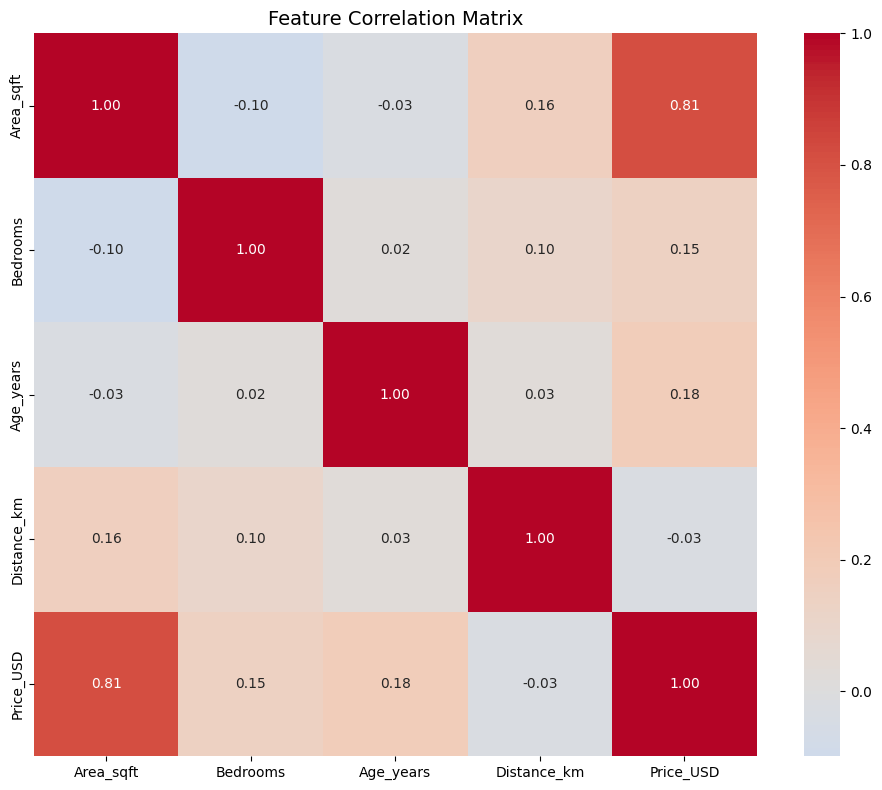

In [ ]:
#Visualize Feature Correlations

plt.figure(figsize=(10, 8))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, center=0 )

plt.title("Feature Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# =============================================================\
# Prepare Data
# =============================================================

# Features and target
X = housing_data[['Area_sqft', 'Bedrooms', 'Age_years', 'Distance_km']].values
y = housing_data['Price_USD'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# =============================================================
# Feature Scaling (Important for Multiple Features!)
# =============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied!")
print(f"\nOriginal feature ranges:")
print(f"Area: {X_train[:, 0].min():.0f} - {X_train[:, 0].max():.0f}")
print(f"Bedrooms: {X_train[:, 1].min():.0f} - {X_train[:, 1].max():.0f}")

# =============================================================
# Train Model
# =============================================================

model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)

print("\nModel Training Complete!")
print(f"Intercept: ${model_multi.intercept_:,.2f}")
print("\nCoefficients:")
features = ['Area', 'Bedrooms', 'Age', 'Distance']
for feature, coef in zip(features, model_multi.coef_):
    print(f"{feature}: {coef:,.2f}")

Feature scaling applied!

Original feature ranges:
Area: 812 - 2968
Bedrooms: 1 - 5

Model Training Complete!
Intercept: $337,557.34

Coefficients:
Area: 92,316.03
Bedrooms: 24,114.43
Age: 20,438.02
Distance: -21,186.03


In [ ]:
# =============================================================
# Make Predictions and Evaluate
# =============================================================

y_pred = model_multi.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("=" * 50)
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# =============================================================
# Example Predictions
# =============================================================

print("\nSample Predictions:")
print("-" * 70)
for i in range(5):
    print(f"House {i+1}:")
    print(f"  Area: {X_test[i, 0]:.0f} sqft, Bedrooms: {X_test[i, 1]:.0f}, "
          f"Age: {X_test[i, 2]:.1f} years, Distance: {X_test[i, 3]:.1f} km")
    print(f"  Predicted Price: ${y_pred[i]:,.2f}")
    print(f"  Actual Price: ${y_test[i]:,.2f}")
    print(f"  Error: ${abs(y_pred[i] - y_test[i]):,.2f}")
    print()


Model Performance:
RMSE: $53,325.11
MAE: $38,226.93
R-squared Score: 0.8147

Sample Predictions:
----------------------------------------------------------------------
House 1:
  Area: 1886 sqft, Bedrooms: 4, Age: 32.5 years, Distance: 29.6 km
  Predicted Price: $325,660.05
  Actual Price: $317,454.14
  Error: $8,205.91

House 2:
  Area: 1203 sqft, Bedrooms: 1, Age: 34.8 years, Distance: 29.4 km
  Predicted Price: $181,764.76
  Actual Price: $114,285.72
  Error: $67,479.04

House 3:
  Area: 2137 sqft, Bedrooms: 3, Age: 42.9 years, Distance: 20.4 km
  Predicted Price: $382,721.82
  Actual Price: $476,793.31
  Error: $94,071.49

House 4:
  Area: 1323 sqft, Bedrooms: 1, Age: 41.9 years, Distance: 17.7 km
  Predicted Price: $239,071.16
  Actual Price: $178,855.72
  Error: $60,215.44

House 5:
  Area: 815 sqft, Bedrooms: 4, Age: 23.2 years, Distance: 4.3 km
  Predicted Price: $227,622.60
  Actual Price: $232,208.68
  Error: $4,586.07



In [ ]:
# =============================================================
# Generate Synthetic Student Performance Dataset
# =============================================================

np.random.seed(42)
n_students = 300

# Features
study_hours = np.random.uniform(0, 10, n_students)
previous_score = np.random.uniform(40, 100, n_students)

# Generate pass/fail labels with logical relationship
# Higher study hours and previous scores increase probability of passing
pass_probability = 1 / (1 + np.exp(-(0.5 * study_hours + 0.05 * previous_score - 5)))
passed = (pass_probability + np.random.normal(0, 0.1, n_students)) > 0.5
passed = passed.astype(int)

# Create DataFrame
student_data = pd.DataFrame({'Study_Hours': study_hours,'Previous_Score': previous_score,'Passed': passed })

print("Student Dataset Overview:")
print(student_data.head(10))
print(f"\nDataset shape: {student_data.shape}")
print("\nClass distribution:")
print(student_data['Passed'].value_counts())
print(f"\nPass rate: {student_data['Passed'].mean() * 100:.1f}%")

Student Dataset Overview:
   Study_Hours  Previous_Score  Passed
0     3.745401       43.100903       0
1     9.507143       71.881278       1
2     7.319939       72.438107       1
3     5.986585       78.245794       1
4     1.560186       83.565480       0
5     1.559945       98.551125       1
6     0.580836       70.978021       0
7     8.661761       59.377388       1
8     6.011150       87.711172       1
9     7.080726       56.249935       1

Dataset shape: (300, 3)

Class distribution:
Passed
1    209
0     91
Name: count, dtype: int64

Pass rate: 69.7%


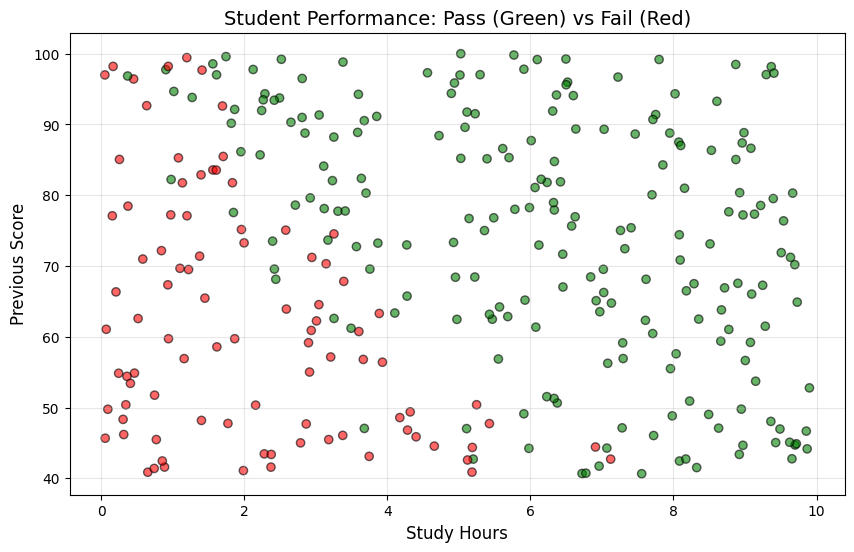

In [ ]:
# =============================================================
# Visualize the Data
# =============================================================

plt.figure(figsize=(10, 6))
colors = ['red' if p == 0 else 'green' for p in student_data['Passed']]

plt.scatter( student_data['Study_Hours'],student_data['Previous_Score'], c=colors, alpha=0.6, edgecolors='black')
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Previous Score', fontsize=12)
plt.title('Student Performance: Pass (Green) vs Fail (Red)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('student_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# =============================================================
# Prepare Data
# =============================================================

X = student_data[['Study_Hours', 'Previous_Score']].values
y = student_data['Passed'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y ) # Maintain class distribution
# =============================================================
# Scale features
# =============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("\nTraining set class distribution:")
print(f"  Failed: {(y_train == 0).sum()}")
print(f"  Passed: {(y_train == 1).sum()}")

# =============================================================
# Train Logistic Regression Model
# =============================================================

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)

print("\nModel Training Complete!")
print(f"Intercept: {log_model.intercept_[0]:.4f}")
print("\nCoefficients:")
print(f"  Study Hours: {log_model.coef_[0][0]:.4f}")
print(f"  Previous Score: {log_model.coef_[0][1]:.4f}")

Training set size: 240
Testing set size: 60

Training set class distribution:
  Failed: 73
  Passed: 167

Model Training Complete!
Intercept: 2.1642

Coefficients:
  Study Hours: 3.3418
  Previous Score: 1.9069


In [ ]:
# =============================================================
# Make Predictions
# =============================================================

# Predict classes
y_pred = log_model.predict(X_test_scaled)

# Predict probabilities
y_pred_proba = log_model.predict_proba(X_test_scaled)

print("\nSample Predictions:")
print("-" * 70)

for i in range(5):
    print(f"Student {i+1}:")
    print(f"  Study Hours: {X_test[i, 0]:.2f}, Previous Score: {X_test[i, 1]:.2f}")
    print(f"  Predicted: {'Pass' if y_pred[i] == 1 else 'Fail'}")
    print(f"  Actual: {'Pass' if y_test[i] == 1 else 'Fail'}")
    print(f"  Pass Probability: {y_pred_proba[i][1]:.4f}")
    print(f"  Fail Probability: {y_pred_proba[i][0]:.4f}")
    print()


Sample Predictions:
----------------------------------------------------------------------
Student 1:
  Study Hours: 5.77, Previous Score: 99.80
  Predicted: Pass
  Actual: Pass
  Pass Probability: 0.9979
  Fail Probability: 0.0021

Student 2:
  Study Hours: 0.45, Previous Score: 96.41
  Predicted: Fail
  Actual: Fail
  Pass Probability: 0.4367
  Fail Probability: 0.5633

Student 3:
  Study Hours: 2.58, Previous Score: 75.06
  Predicted: Fail
  Actual: Fail
  Pass Probability: 0.4927
  Fail Probability: 0.5073

Student 4:
  Study Hours: 1.56, Previous Score: 83.57
  Predicted: Fail
  Actual: Fail
  Pass Probability: 0.4218
  Fail Probability: 0.5782

Student 5:
  Study Hours: 1.62, Previous Score: 58.57
  Predicted: Fail
  Actual: Fail
  Pass Probability: 0.0555
  Fail Probability: 0.9445



In [ ]:
# =============================================================
# Calculate Classification Metrics
# =============================================================

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Failed', 'Passed'])

print("Model Performance Metrics:")
print("=" * 50)
print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("\nConfusion Matrix:")
print(cm)
print("\nInterpretation:")
print(f"  True Negatives (Correct Fail): {cm[0,0]}")
print(f"  False Positives (Wrong Pass): {cm[0,1]}")
print(f"  False Negatives (Wrong Fail): {cm[1,0]}")
print(f"  True Positives (Correct Pass): {cm[1,1]}")
print("\nDetailed Classification Report:")
print(report)

Model Performance Metrics:
Accuracy: 0.9667 (96.67%)

Confusion Matrix:
[[16  2]
 [ 0 42]]

Interpretation:
  True Negatives (Correct Fail): 16
  False Positives (Wrong Pass): 2
  False Negatives (Wrong Fail): 0
  True Positives (Correct Pass): 42

Detailed Classification Report:
              precision    recall  f1-score   support

      Failed       1.00      0.89      0.94        18
      Passed       0.95      1.00      0.98        42

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



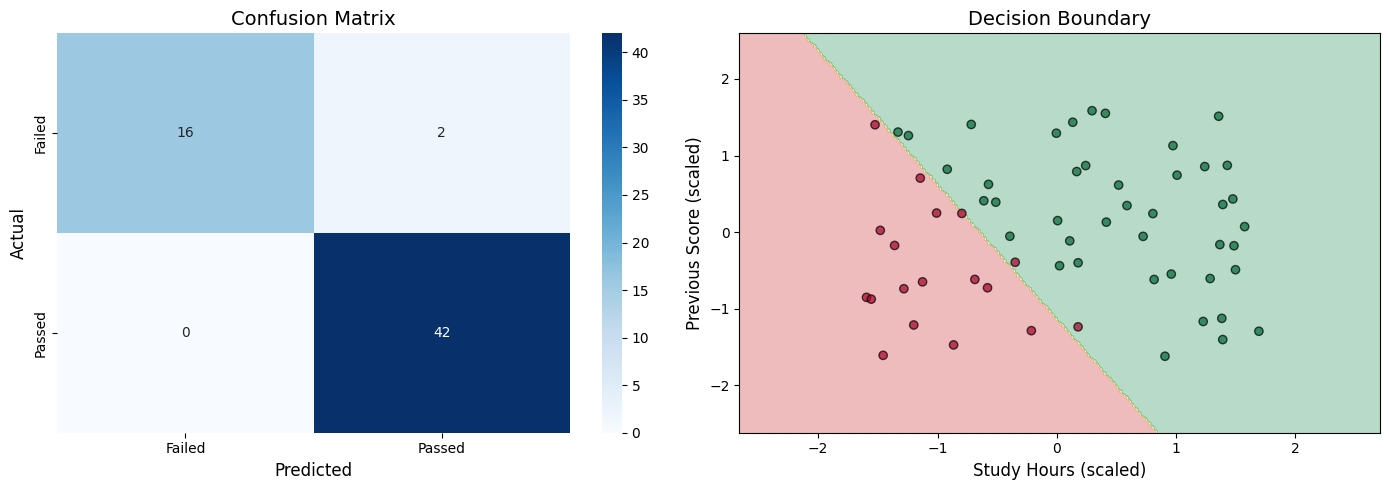

In [ ]:
# =============================================================
# Visualize Results
# =============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'], ax=axes[0] )
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Confusion Matrix', fontsize=14)

# Plot 2: Decision Boundary
x_min = X_train_scaled[:, 0].min() - 1
x_max = X_train_scaled[:, 0].max() + 1
y_min = X_train_scaled[:, 1].min() - 1
y_max = X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                c=y_test, cmap='RdYlGn',
                edgecolors='black', alpha=0.7)
axes[1].set_xlabel('Study Hours (scaled)', fontsize=12)
axes[1].set_ylabel('Previous Score (scaled)', fontsize=12)
axes[1].set_title('Decision Boundary', fontsize=14)

plt.tight_layout()
plt.savefig('logistic_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# 6.1 Excersie 1: Linear Regresion

# ============================================================
# 1. Generate synthetic data with noise
# ============================================================


np.random.seed(42)

n_samples = 300

# Generate random input voltages (Vin) and resistances (R1, R2)
Vin = np.random.uniform(0, 10, n_samples)  # Input voltage (0 to 10 V)
R1 = np.random.uniform(100, 1000, n_samples)  # Resistance R1 (100 to 1000 ohms)
R2 = np.random.uniform(100, 1000, n_samples)  # Resistance R2 (100 to 1000 ohms)

# Vout = (R2 / (R1 + R2)) * Vin + noise
Vout = (R2 / (R1 + R2)) * Vin + np.random.normal(0, 0.5, n_samples)  # Added noise

# Prepare features (R1, R2) and target (Vout)
X = np.column_stack((R1, R2))
y = Vout

In [27]:
# ============================================================
# 2. Train a multiple linear regression model
# ============================================================

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the training and testing set sizes
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 240
Testing set size: 60


In [28]:
# ============================================================
# 3. Evaluate using RMSE and R2 score
# ============================================================

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("\nModel Performance Metrics:")
print("=" * 50)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance Metrics:
Root Mean Squared Error (RMSE): 1.5649
R-squared Score: 0.1289


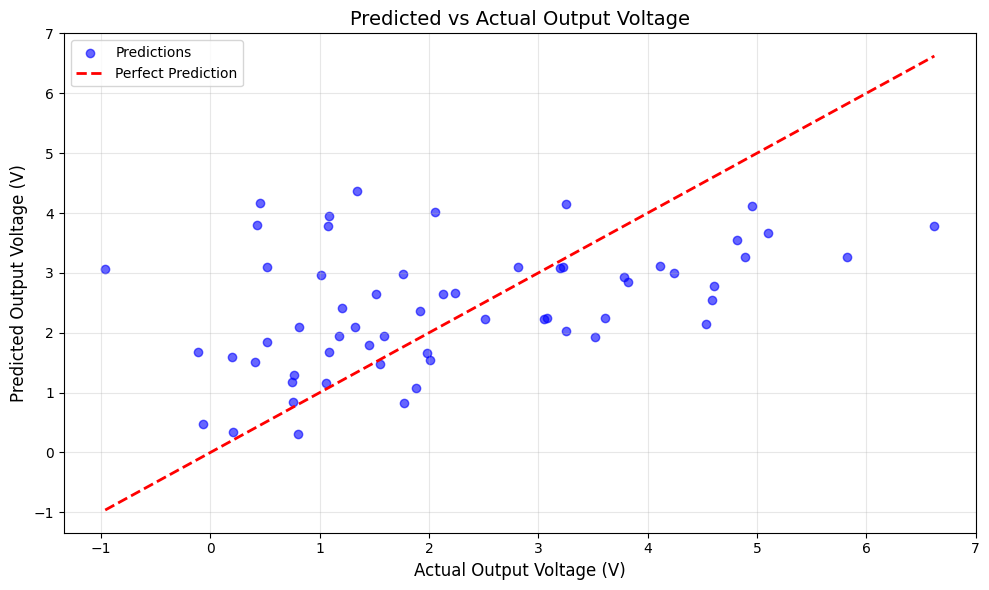

In [29]:
# ============================================================
# 4. Visualize predictions vs actual values
# ============================================================

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Output Voltage (V)', fontsize=12)
plt.ylabel('Predicted Output Voltage (V)', fontsize=12)
plt.title('Predicted vs Actual Output Voltage', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# ============================================================
# 5. Calculate percentage error for test cases
# ============================================================

percentage_error = np.abs((y_test - y_pred) / y_test) * 100

print("\nPercentage Error for Test Cases:")
print("=" * 50)
for i in range(5):
    print(f"Test Case {i+1}:")
    print(f" Actual: {y_test[i]:.2f} V, Predicted: {y_pred[i]:.2f} V, Percentage Error: {percentage_error[i]:.2f}%")
    print()


Percentage Error for Test Cases:
Test Case 1:
 Actual: 3.52 V, Predicted: 1.93 V, Percentage Error: 45.05%

Test Case 2:
 Actual: 2.51 V, Predicted: 2.22 V, Percentage Error: 11.38%

Test Case 3:
 Actual: 0.52 V, Predicted: 3.10 V, Percentage Error: 494.24%

Test Case 4:
 Actual: 5.10 V, Predicted: 3.67 V, Percentage Error: 28.07%

Test Case 5:
 Actual: 1.45 V, Predicted: 1.80 V, Percentage Error: 23.87%

